In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataquest-frippe-problem/sample_submission.csv
/kaggle/input/dataquest-frippe-problem/test.csv
/kaggle/input/dataquest-frippe-problem/data.csv


In [184]:
data = pd.read_csv('/kaggle/input/dataquest-frippe-problem/data.csv')

In [164]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def clean_onehot(data):
    scaler = StandardScaler()
    encoder = OneHotEncoder()
    
    # Scale numerical features
    data.toul = scaler.fit_transform(np.array(data.toul).reshape(-1,1))
    data['3ordh'] = scaler.fit_transform(np.array(data["3ordh"]).reshape(-1,1))
    data['khochn'] = scaler.fit_transform(np.array(data["khochn"]).reshape(-1,1))
    data.R = scaler.fit_transform(np.array(data.R).reshape(-1,1))
    data.G = scaler.fit_transform(np.array(data.G).reshape(-1,1))
    data.B = scaler.fit_transform(np.array(data.B).reshape(-1,1))
    
    # Encode categorical features with OneHotEncoder
    marka_encoded = encoder.fit_transform(np.array(data.marka).reshape(-1, 1))
    naw3_encoded = encoder.fit_transform(np.array(data.naw3).reshape(-1, 1))
    hat3a_encoded = encoder.fit_transform(np.array(data['9at3a']).reshape(-1, 1))
    
    # Convert sparse matrices to arrays and concatenate
    encoded_features = np.concatenate([marka_encoded.toarray(), naw3_encoded.toarray(), hat3a_encoded.toarray()], axis=1)
    
    # Create DataFrame for encoded features
    encoded_df = pd.DataFrame(encoded_features, columns=['marka_' + str(i) for i in range(marka_encoded.shape[1])] + 
                                                    ['naw3_' + str(i) for i in range(naw3_encoded.shape[1])] +
                                                    ['hat3a_' + str(i) for i in range(hat3a_encoded.shape[1])])
    
    # Concatenate numerical and encoded categorical features
    data_encoded = pd.concat([data.drop(columns=['marka', 'naw3', '9at3a']), encoded_df], axis=1)
    
    return data_encoded

In [165]:
data.columns

Index(['ID', 'marka', 'naw3', '9at3a', 'khochn', 'toul', '3ordh', 'R', 'G',
       'B', 'soum'],
      dtype='object')

In [166]:
data = data[data["toul"]<260]
data = data.loc[(data["3ordh"] < 70) & (data["3ordh"] > 51)]
data = data.loc[(data["khochn"] < 1.16) & (data["khochn"] > 0.92)]
data = data.loc[(data["R"] < 240) & (data["R"] > 100)]
data = data.loc[(data["G"] < 50) & (data["G"] > 10)]
data = data.loc[(data["B"] < 53) & (data["B"] > 17)]

In [167]:
data.describe()

,ID,khochn,toul,3ordh,R,G,B,soum
count,46748.000000,46748.000000,46748.000000,46748.000000,46748.000000,46748.000000,46748.000000,46748.000000
mean,24287.109652,1.029049,65.243296,57.457380,136.909493,24.550334,28.147279,404.599048
std,14011.001128,0.023226,37.514348,2.207155,25.971066,4.718718,5.434592,399.875319
min,1.000000,0.921667,20.000000,51.600000,101.000000,17.000000,18.000000,33.500000
25%,12174.750000,1.016667,32.800000,56.000000,113.000000,20.000000,23.000000,101.300000
50%,24296.500000,1.030000,56.800000,57.000000,136.000000,24.000000,28.000000,255.700000
75%,36407.250000,1.041667,84.000000,59.000000,155.000000,28.000000,32.000000,546.600000
max,48547.000000,1.158333,259.200000,69.000000,226.000000,40.000000,49.000000,1882.300000


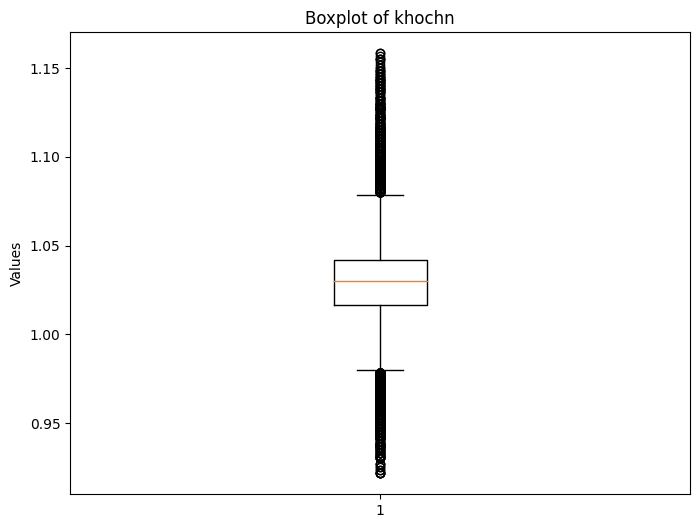

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
column_name = 'khochn'
plt.boxplot(data[column_name])
plt.title('Boxplot of ' + column_name)
plt.ylabel('Values')
plt.show()

In [181]:
X_train.shape

(36349, 7)

In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def clean_label(data):
    scaler = StandardScaler()
    label = LabelEncoder()
    data['vol'] = data['toul'] * data['3ordh'] * data['khochn']
    columns_to_drop = ['khochn', 'toul', '3ordh']
    data.drop(columns=columns_to_drop, inplace=True)
    data = data.loc[(data["R"] < 240) & (data["R"] > 100)]
    data = data.loc[(data["G"] < 50) & (data["G"] > 10)]
    data = data.loc[(data["B"] < 53) & (data["B"] > 17)]
    threshold = 3
    for column in ['vol','R','G','B','soum']:
        # Calculate Z-score for the column
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

        # Filter out rows with Z-score greater than the threshold
        data = data[z_scores < threshold]

    data.vol = scaler.fit_transform(np.array(data.vol).reshape(-1,1))
    data.R = scaler.fit_transform(np.array(data.R).reshape(-1,1))
    data.G = scaler.fit_transform(np.array(data.G).reshape(-1,1))
    data.B = scaler.fit_transform(np.array(data.B).reshape(-1,1))
    data.marka = label.fit_transform(data.marka)
    data.naw3 = label.fit_transform(data.naw3)
    data['9at3a'] = label.fit_transform(data['9at3a'])
    X = data.drop(columns=['soum','ID'])
    Y = data.soum
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.06, random_state=42)
    return X_train, X_test, y_train, y_test

In [170]:
data_e = clean_onehot(data)
X = data_e.drop(columns=['soum'])
Y = data_e.soum
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [186]:
X_train, X_test, y_train, y_test= clean_label(data)

In [188]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
model1 = XGBRegressor(n_estimators=100, max_depth=9)
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
r2 = r2_score(y_test,predictions)
print(r2)

0.9753651226660092


In [177]:
X_train.shape

(36349, 7)

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([
    Dense(units = 1024, activation='relu'),
    BatchNormalization(),
    Dense(units = 512, activation='relu'),
    BatchNormalization(),
    Dense(units = 256, activation='relu'),
    BatchNormalization(),
    Dense(units = 128, activation='relu'),
    BatchNormalization(),
    Dense(units = 128, activation='relu'),
    BatchNormalization(),
    Dense(units = 64, activation='relu'),
    BatchNormalization(),
    Dense(units = 32, activation='relu'),
    BatchNormalization(),
    Dense(units = 16, activation='relu'),
    Dense(units = 1, activation='linear')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']) 
model.fit(X_train,y_train,batch_size=512,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
71/71 [==============================] - 5s 31ms/step - loss: 243843.8438 - mae: 363.3727 - val_loss: 244461.8281 - val_mae: 364.4640
Epoch 2/100
71/71 [==============================] - 2s 29ms/step - loss: 232631.6406 - mae: 356.0910 - val_loss: 240464.6406 - val_mae: 361.8181
Epoch 3/100
71/71 [==============================] - 2s 27ms/step - loss: 212584.0000 - mae: 343.2607 - val_loss: 218549.1250 - val_mae: 345.8448
Epoch 4/100
71/71 [==============================] - 2s 29ms/step - loss: 182328.9375 - mae: 321.7592 - val_loss: 178464.8281 - val_mae: 316.0359
Epoch 5/100
71/71 [==============================] - 2s 29ms/step - loss: 143534.0312 - mae: 290.5522 - val_loss: 92924.4141 - val_mae: 239.0665
Epoch 6/100
71/71 [==============================] - 2s 31ms/step - loss: 100633.4766 - mae: 248.0689 - val_loss: 46740.7695 - val_mae: 165.1491
Epoch 7/100
71/71 [==============================] - 2s 29ms/step - loss: 61383.8984 - mae: 197.4442 - val_loss: 15918.8770 - 

In [179]:
from sklearn.metrics import r2_score

# Assuming y_true are your actual target values and y_pred are your predicted values

# Calculate the R2 score
r2 = r2_score(y_train, model.predict(X_train))
print("R2 Score:", r2)

1136/1136 [==============================] - 2s 2ms/step
R2 Score: 0.9762591038559724


In [ ]:
def clean_test(data):
    scaler = StandardScaler()
    label = LabelEncoder()
    data.toul = scaler.fit_transform(np.array(data.toul).reshape(-1,1))
    data['3ordh'] = scaler.fit_transform(np.array(data["3ordh"]).reshape(-1,1))
    data['khochn'] = scaler.fit_transform(np.array(data["khochn"]).reshape(-1,1))
    data.R = scaler.fit_transform(np.array(data.R).reshape(-1,1))
    data.G = scaler.fit_transform(np.array(data.G).reshape(-1,1))
    data.B = scaler.fit_transform(np.array(data.B).reshape(-1,1))
    data.marka = label.fit_transform(data.marka)
    data.naw3 = label.fit_transform(data.naw3)
    data['9at3a'] = label.fit_transform(data['9at3a'])
    return data

In [ ]:
model1

In [ ]:
test = pd.read_csv('/kaggle/input/dataquest-frippe-problem/test.csv')
predictions = model1.predict(clean_test(test).drop(columns=['ID']))
predictions_df = pd.DataFrame({'ID':clean_test(test).ID , 'Predictions': predictions})
predictions_df.to_csv('submission7.csv',index=False)